### CV Assignment 2

Pragya Jaiswal(MDS202129)

## Q7

In [36]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 12)
import pandas as pd

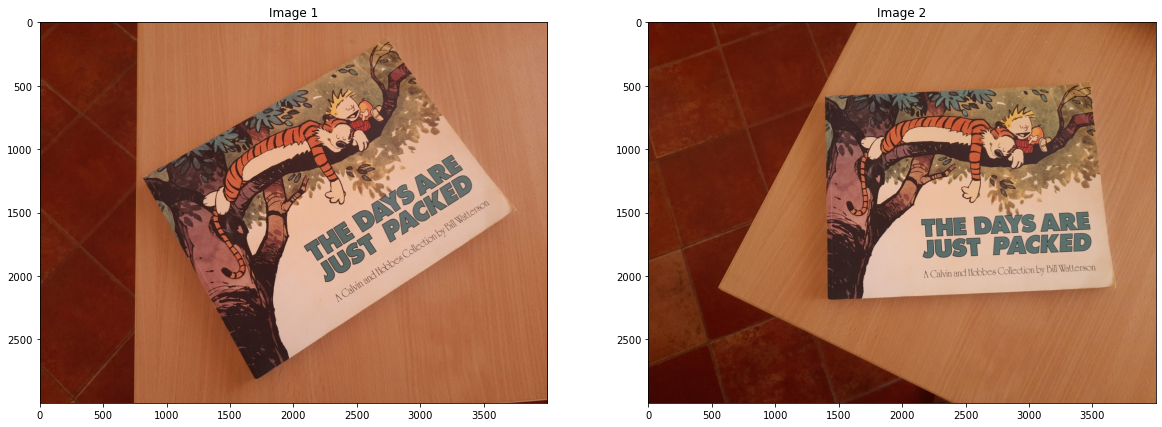

In [37]:

# Reading images
img1 = cv2.imread('image1.jpg')
img2 = cv2.imread('image2.jpg')

# Displaying images
fig, ax = plt.subplots(1,2)
ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax[0].set_title('Image 1')
ax[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax[1].set_title('Image 2');

In [38]:
##Resizing the image to fit on screen

scale_percent = 20 # percent of original size

#for image1
width1 = int(img1.shape[1] * scale_percent / 100)
height1 = int(img1.shape[0] * scale_percent / 100)
dim1 = (width1, height1)
  
#for image2

width2 = int(img2.shape[1] * scale_percent / 100)
height2 = int(img2.shape[0] * scale_percent / 100)
dim2 = (width2, height2)

# resize image
img1_r = cv2.resize(img1, dim1, interpolation = cv2.INTER_AREA)
img2_r = cv2.resize(img2, dim2, interpolation = cv2.INTER_AREA)

In [39]:
## function to get coordinates of points in images

global pts
pts = []

def click_event1(event, x, y, flags, params):
  
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
  
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
        pts.append([ x, y ])
        
        # displaying the coordinates
        # on the image window
        #font = cv2.FONT_HERSHEY_SIMPLEX
        #cv2.putText(img, str(x) + ',' +
                    #str(y), (x,y), font,
                    #1, (255, 0, 0), 2)
        cv2.imshow('image', img)
        

  
    # checking for right mouse clicks     
    if event==cv2.EVENT_RBUTTONDOWN:
  
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
  
        # displaying the coordinates
        # on the image window
#         font = cv2.FONT_HERSHEY_SIMPLEX
#         b = img[y, x, 0]
#         g = img[y, x, 1]
#         r = img[y, x, 2]
#         cv2.putText(img, str(b) + ',' +
#                     str(g) + ',' + str(r),
#                     (x,y), font, 1,
#                     (255, 255, 0), 2)
        cv2.imshow('image', img)
  


In [40]:
# image1 driver function
if __name__=="__main__":
  
    img = img1_r
    # displaying the image
    cv2.imshow('image', img)
  
    # setting mouse handler for the image
    # and calling the click_event() function
    cv2.setMouseCallback('image', click_event1)
  
    # wait for a key to be pressed to exit
    cv2.waitKey(0)
  
    # close the window
    cv2.destroyAllWindows()

162   243
546   23
339   563
749   297


In [41]:
pts1 = np.array(pts)
print(pts1)

[[162 243]
 [546  23]
 [339 563]
 [749 297]]


In [42]:
# image2 driver function

if __name__=="__main__":
  
    img = img2_r
    
    # displaying the image
    cv2.imshow('image', img)
  
    # setting mouse handler for the image
    # and calling the click_event() function
    cv2.setMouseCallback('image', click_event1)
  
    # wait for a key to be pressed to exit
    cv2.waitKey(0)
  
    # close the window
    cv2.destroyAllWindows()

279   116
695   97
283   437
737   418


In [43]:
pts2 = np.array(pts[4:8])

### Part(a)

In [44]:
#taking the coordinates of corner points of the book collected above as the 4 points for homography

#Points were taken in order: top-left, top-right, bottom-left, bottom-right

print("Array of 4 points taken from Image 1:", pts1)
print("Array of 4 points taken from Image 2:",pts2)

Array of 4 points taken from Image 1: [[162 243]
 [546  23]
 [339 563]
 [749 297]]
Array of 4 points taken from Image 2: [[279 116]
 [695  97]
 [283 437]
 [737 418]]


### Part (b)

In [45]:
def calc_A(pts1, pts2, n_points=4):
    A = []

    for i in range(0, n_points):
        x_1, y_1 = pts1[i, 0], pts1[i, 1]
        x_2, y_2 = pts2[i, 0], pts2[i, 1]

        # here we are assuming w_i is 1
        A.append([0, 0, 0, -x_1, -y_1, -1, y_2*x_1, y_2*y_1, y_2])
        A.append([x_1, y_1, 1, 0, 0, 0, -x_2*x_1, -x_2*y_1, -x_2])
    
    assert (np.shape(A) == (2*n_points, 9))
    return np.asarray(A)

def homography(pts1, pts2):

  # Compute matrix A (of dimension 2n*9)
  A = calc_A(pts1, pts2)
  

  # Compute SVD of A
  U, S, V = np.linalg.svd(A)

  # Take h as last column of V
  h = V[-1, :]

  # Calculating homography
  H = h.reshape(3,3)

  return A, H
     

The system of equations being used to solve for elements of the homography are:


In [46]:
# Calculating homography between image1 and image2 and storing in H
A, H = homography(pts1, pts2)
rank = np.linalg.matrix_rank(A)

print("The system of equations is given by Ax = b where matrix A is a 8x9 matrix given by:\n",A)
print("\nx is a 9x1 vector with entries as: \n [h11 h12 h13 h21 h22 h23 h31 h32 h33]")
print("\nand b is a 8x1 null vector")
print("\nRank of the matrix A is:",rank)

The system of equations is given by Ax = b where matrix A is a 8x9 matrix given by:
 [[      0       0       0    -162    -243      -1   18792   28188     116]
 [    162     243       1       0       0       0  -45198  -67797    -279]
 [      0       0       0    -546     -23      -1   52962    2231      97]
 [    546      23       1       0       0       0 -379470  -15985    -695]
 [      0       0       0    -339    -563      -1  148143  246031     437]
 [    339     563       1       0       0       0  -95937 -159329    -283]
 [      0       0       0    -749    -297      -1  313082  124146     418]
 [    749     297       1       0       0       0 -552013 -218889    -737]]

x is a 9x1 vector with entries as: 
 [h11 h12 h13 h21 h22 h23 h31 h32 h33]

and b is a 8x1 null vector

Rank of the matrix A is: 8


In [47]:
print('Homography between image1 and image2:', H, sep='\n')

Homography between image1 and image2:
[[-2.53595891e-03  1.30651263e-03 -8.67455908e-01]
 [-1.36189796e-03 -2.78324668e-03  4.97484558e-01]
 [ 4.05845135e-07 -4.12267927e-07 -3.40928868e-03]]


### Part (c)

In [48]:
# Calculating homography using opencv and storing in h
h, _ = cv2.findHomography(pts1, pts2)
print('Homography between image1 and image2 (calculated using OpenCV):', h, sep='\n')

Homography between image1 and image2 (calculated using OpenCV):
[[ 7.43838129e-01 -3.83221473e-01  2.54438972e+02]
 [ 3.99466894e-01  8.16371664e-01 -1.45920338e+02]
 [-1.19041000e-04  1.20924910e-04  1.00000000e+00]]


In [49]:
# Normalizing h to check whether it is a scalar multiple of H
h_new = h / np.linalg.norm(h)
print('Normalized h:', h_new, sep='\n')
print('\n\nThus our results are comparable to that from opencv')

Normalized h:
[[ 2.53595891e-03 -1.30651263e-03  8.67455908e-01]
 [ 1.36189796e-03  2.78324668e-03 -4.97484558e-01]
 [-4.05845135e-07  4.12267927e-07  3.40928868e-03]]


Thus our results are comparable to that from opencv


### Part (d)

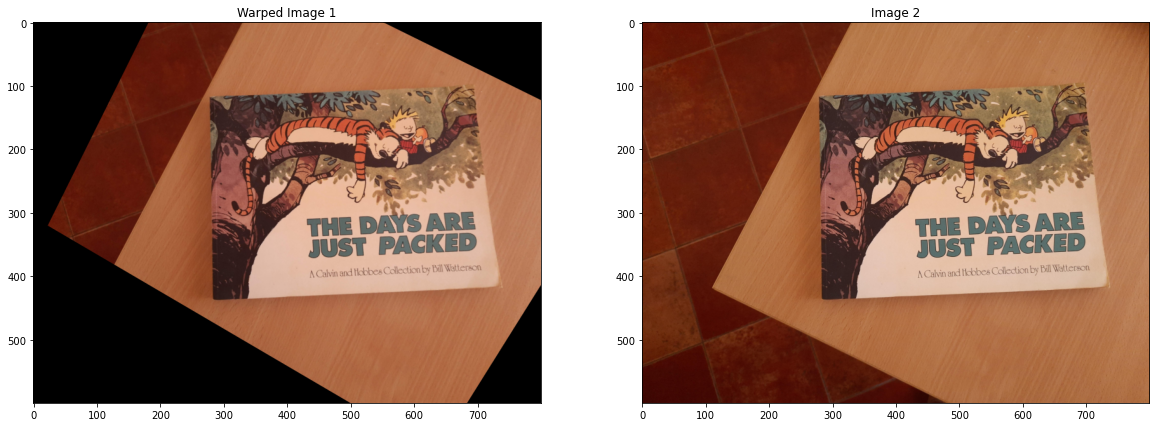

In [50]:
# Warping image1 
out = cv2.warpPerspective(img1_r, H ,(img2_r.shape[1], img2_r.shape[0]))
fig, ax = plt.subplots(1,2)
ax[0].imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
ax[0].set_title('Warped Image 1')
ax[1].imshow(cv2.cvtColor(img2_r, cv2.COLOR_BGR2RGB))
ax[1].set_title('Image 2');

On applying homography to Image1, it resulted in the rotation of the image to align with Image2. In doing so, some parts of Image1 get cut out and hence leaves black patches in the output image. 
The 4 points we chose in image 1 (4 corners of the book) get aligned to the corresponding 4 point of image 2. The plane on which these points reside in the real world gets aligned as the plane containing their four corresponding points in the destination image. Thus, ALL points on that plane get aligned correctly as they are in the destinnation image. But the points that are NOT on that plane will NOT be aligned by the homography. These points get lost after the transformation leaving blank (black) pixels on the resulting picture.

## Q8

In [51]:
##Reading the image
img3 = cv2.imread('image3.jpg')

##Resizing the image to fit on screen

scale_percent = 20 # percent of original size

#for image3
width3 = int(img3.shape[1] * scale_percent / 100)
height3 = int(img3.shape[0] * scale_percent / 100)
dim3 = (width3, height3)
  

# resize image
img3_r = cv2.resize(img3, dim3, interpolation = cv2.INTER_AREA)
print(dim3)

(800, 600)


In [52]:
# image3 driver function

pts = []
if __name__=="__main__":
  
    img = img3_r
    # displaying the image
    cv2.imshow('image', img)
  
    # setting mouse handler for the image
    # and calling the click_event() function
    cv2.setMouseCallback('image', click_event1)
  
    # wait for a key to be pressed to exit
    cv2.waitKey(0)
  
    # close the window
    cv2.destroyAllWindows()

39   23
752   14
39   565
758   554


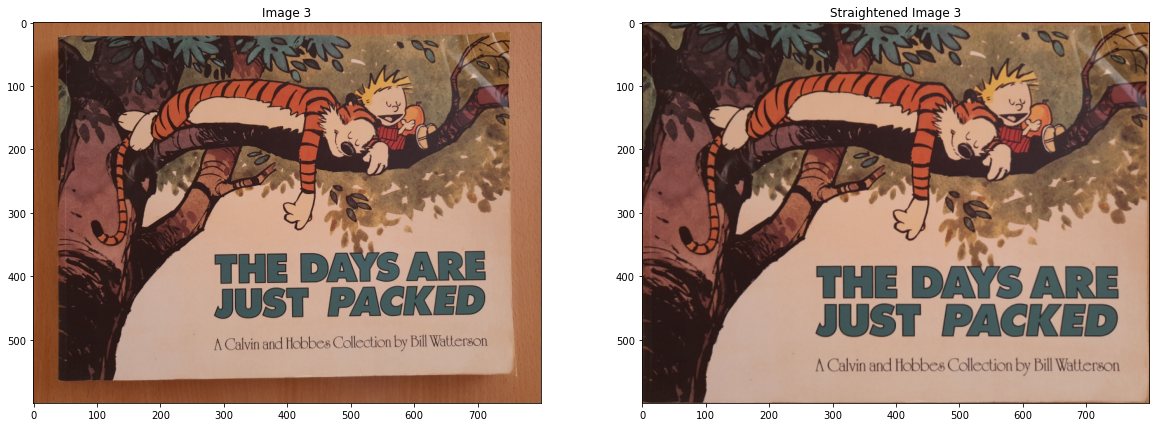

In [53]:
# Corner points of the book on source image
pts3 = np.array(pts)

# Keeping aspect ratio as 30/23, the image size can be taken as 3000x2300
output_pts = np.array([[0,0], [799,0], [0,599], [799,599]])

# Calculating homography
_, H_new = homography(pts3, output_pts)

# Warping image
out = cv2.warpPerspective(img3_r, H_new ,(800, 600),flags=cv2.INTER_LINEAR)

fig, ax = plt.subplots(1,2)
ax[0].imshow(cv2.cvtColor(img3_r, cv2.COLOR_BGR2RGB))
ax[0].set_title('Image 3')
ax[1].imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
ax[1].set_title('Straightened Image 3');

## Q9

Use case 1:

Using homography for obtaining the Ad from a billboard (Perspective correction)

Text(0.5, 1.0, 'Advertisement on billboard')

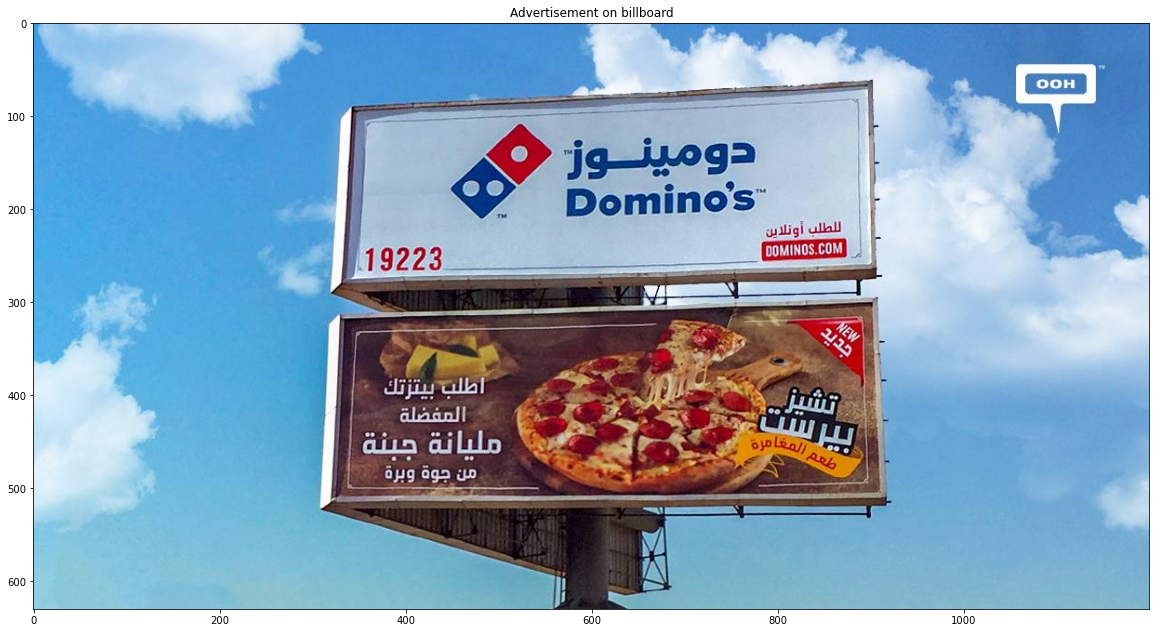

In [54]:
# Reading image
ad1 = cv2.imread('ad1.jpg')

# Displaying images
fig, ax = plt.subplots(1,1)
ax.imshow(cv2.cvtColor(ad1, cv2.COLOR_BGR2RGB))
ax.set_title('Advertisement on billboard')


In [55]:
# image driver function

pts = []
if __name__=="__main__":
  
    img = ad1
    
    # displaying the image
    cv2.imshow('image', img)
  
    # setting mouse handler for the image
    # and calling the click_event() function
    cv2.setMouseCallback('image', click_event1)
  
    # wait for a key to be pressed to exit
    cv2.waitKey(0)
  
    # close the window
    cv2.destroyAllWindows()


348   96
898   71
900   260
335   275


In [56]:
ad1.shape

(630, 1200, 3)

In [57]:
# Corner points of the Ad on source image
pts_ad = np.array(pts)
print(pts_ad)

#points are taken clockwise starting from top left corner

output_pts = np.array([[0,0], [1199,0], [1199,629], [0,629]])



[[348  96]
 [898  71]
 [900 260]
 [335 275]]


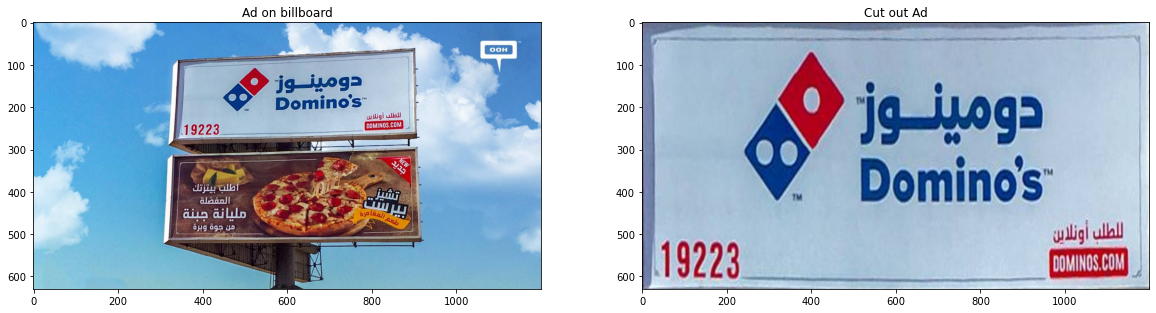

In [58]:
# Calculating homography
_, H_new = homography(pts_ad, output_pts)

# Warping image
out = cv2.warpPerspective(ad1, H_new ,(1200, 630),flags=cv2.INTER_LINEAR)

fig, ax = plt.subplots(1,2)
ax[0].imshow(cv2.cvtColor(ad1, cv2.COLOR_BGR2RGB))
ax[0].set_title('Ad on billboard')
ax[1].imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
ax[1].set_title('Cut out Ad');

In [59]:
out.shape

(630, 1200, 3)

Use case 2:
Placing the Ad obtained from the billboard in Use case 1 on a billboard in Times Square

Text(0.5, 1.0, 'Ad which we want to replace existing Ad with')

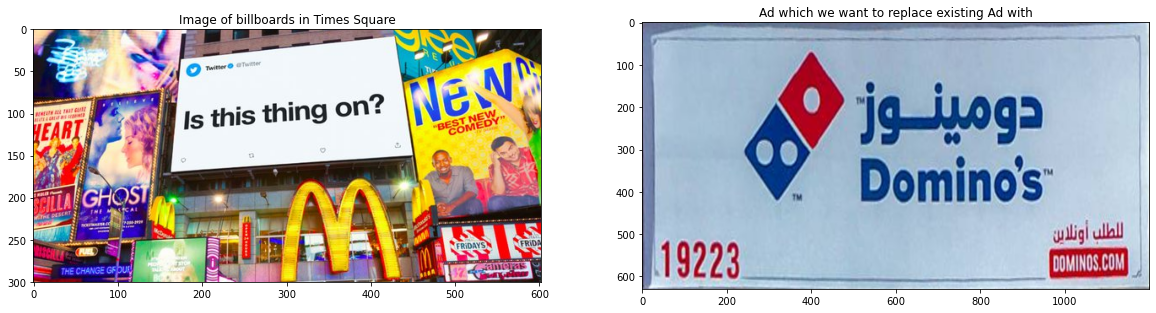

In [60]:
# Reading images
tsq_billboard = cv2.imread('billboard.jpeg')
my_pic = out


# Displaying images
fig, ax = plt.subplots(1,2)
ax[0].imshow(cv2.cvtColor(tsq_billboard, cv2.COLOR_BGR2RGB))
ax[0].set_title('Image of billboards in Times Square')
ax[1].imshow(cv2.cvtColor(my_pic, cv2.COLOR_BGR2RGB))
ax[1].set_title('Ad which we want to replace existing Ad with')

In [61]:
# Keeping a copy of original tsq_billboard
tsq_billboard_copy = tsq_billboard.copy()

pts = []
# image driver function
if __name__=="__main__":
  
    img = tsq_billboard
    
    # displaying the image
    cv2.imshow('image', img)
  
    # setting mouse handler for the image
    # and calling the click_event() function
    cv2.setMouseCallback('image', click_event1)
  
    # wait for a key to be pressed to exit
    cv2.waitKey(0)
  
    # close the window
    cv2.destroyAllWindows()


176   39
430   11
451   152
163   171


In [62]:
# Corner points of the billboard on which the new Ad is to be placed
pts_tsq_billboard = np.array(pts)
print(pts_tsq_billboard)

[[176  39]
 [430  11]
 [451 152]
 [163 171]]


In [63]:
my_pic.shape

(630, 1200, 3)

In [64]:
# Corner points of the picture to be installed
pts_ad = np.array([[0,0],  [my_pic.shape[1]-1, 0],
                        [my_pic.shape[1]-1, my_pic.shape[0]-1],[0, my_pic.shape[0]-1]])

# Calculating homography
_, H = homography( pts_ad,pts_tsq_billboard)

# Warping picture
result = cv2.warpPerspective(my_pic, H, (tsq_billboard.shape[1], tsq_billboard.shape[0]), flags=cv2.INTER_LINEAR)

# Blackening the area where new picture is to be inserted
black = cv2.fillConvexPoly(tsq_billboard, pts_tsq_billboard, 0, 16)



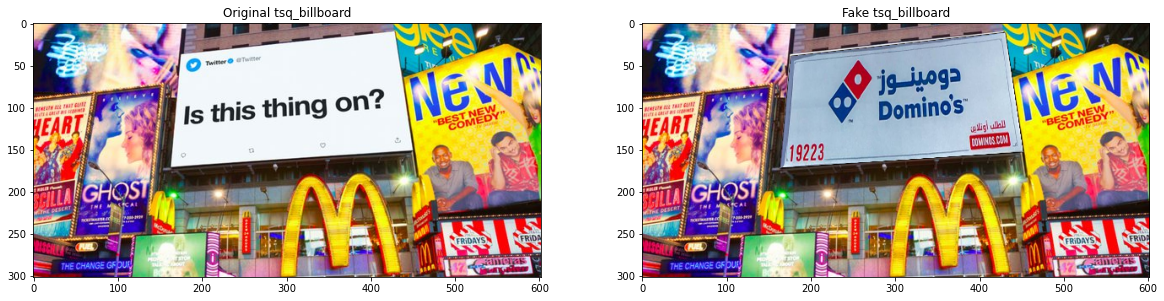

In [65]:
# Generating final output
output = tsq_billboard + result

fig, ax = plt.subplots(1,2)
ax[0].imshow(cv2.cvtColor(tsq_billboard_copy, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original tsq_billboard')
ax[1].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
ax[1].set_title('Fake tsq_billboard')
fig.savefig('Fake_tsq_billboard.jpg')  
     